<h1> <font color="Blue">Data Analysis (Python) Final project: House Price Prediction</font></h1>
<h2> 
    Md Mahamudul Hasan Sabbir <br/>
    231091029
</h2>

<b>Importing Important libraries that are needed for house price prediction</b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

<b>Checking My directory</b>

<b> Importing the two dataset given named "train.csv" and "test.csv" <br>
and using Log transformation for the saleprice of the "train.csv" which is our targeted column</b>

In [6]:
train_data= pd.read_csv("train.csv")
test_data= pd.read_csv("test.csv")

train_data.SalePrice = np.log(train_data.SalePrice)

<b> Printing the first few rows of "train.csv" by using '.head()' If we want to print the last few rows we could use '.tail()' </b>

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


<b>Trying to find those columns which are containg NaN values. By doing this, We could see how many columns are containing the null values <br> 
and what is the percentage of NaN values in these columns so that we can get clear data which is useful for next process
</b>

In [10]:
missing = train_data.isna().sum()
missing = missing[missing>0]
missing_perc = missing/train_data.shape[0]*100

na = pd.DataFrame([missing, missing_perc], index =['missing_num', 'missing_perc']).T

na = na.sort_values(by ='missing_perc', ascending= False)
na

,missing_num,missing_perc
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
MasVnrType,872.0,59.726027
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945


<b> Here I drop those columns that containing more NaN values . Specifically I drop those columns <br>
which containing over 17% of NaN values. I do this for both "train.csv" and "test.csv".
</b> <br>
<b>Also I remove rows with missing values in the Electrical column from both the train_data and test_data datasets. </b>

In [12]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis = 1, inplace = True)
test_data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis = 1, inplace = True)        

train_data.drop(train_data[train_data.Electrical.isna()].index, axis = 0, inplace = True)
test_data.drop(train_data[train_data.Electrical.isna()].index, axis = 0, inplace = True)

In [13]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


<b> Here I drop those columns which contains more zeroes. I check the tail also it showing that there are lots of zeroes .<br>
So i drop these columns </b>

In [15]:
train_data.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis = 1, inplace = True)
test_data.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis = 1, inplace = True)
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,40,8,2007,WD,Normal,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,60,5,2010,WD,Normal,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366,0,4,2010,WD,Normal,11.864462


<b> Here I am tring to find all the numeric columns that are containing at least one zero </b>

In [17]:
columns_with_zeros = train_data.columns[(train_data == 0).any(axis=0)]

print("Columns with zero values:", columns_with_zeros.tolist())

Columns with zero values: ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


<b> 
This list contains numeric columns where a value of 0 might not be meaningful or realistic for a property dataset <br> 
    (e.g., a 0 garage area or 0 bathrooms might be due to missing data rather than actual values). <br>
    The goal is to replace these 0 values with the mean of the non-zero values for the respective column
</b>

In [19]:
columns_to_replace = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
                      'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 
                      'WoodDeckSF', 'OpenPorchSF']


for column in columns_to_replace:
    
    mean_value = train_data[column][train_data[column] != 0].mean()
    train_data[column] = train_data[column].replace(0, mean_value)

for column in columns_to_replace:
    
    mean_value = test_data[column][test_data[column] != 0].mean()
    test_data[column] = test_data[column].replace(0, mean_value)

train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,61.000000,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298.000000,84.731343,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,42.000000,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,196.987106,35.000000,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,40.000000,8,2007,WD,Normal,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349.000000,84.731343,2,2010,WD,Normal,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,60.000000,5,2010,WD,Normal,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366.000000,84.731343,4,2010,WD,Normal,11.864462


<b>
The code identifies all columns with missing values in the dataset, regardless of data type (numeric or categorical), <br> 
and lists the count of missing values for each. It's useful for assessing data quality and planning how to handle missing data during preprocessing.
</b>

In [21]:
missing_values = train_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]  # Columns with missing values
print("Columns with missing values:\n", missing_columns)

Columns with missing values:
 MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


<b>
The code fills missing values (NaN) in specific columns (columns_to_fill) of both train_data and test_data. <br>
If the column has an object (categorical) data type, missing values are filled with the mode (most frequent value).<br>
If the column has a numerical data type, missing values are filled with the mean of the non-missing values.<br>
This process is applied separately to train_data and test_data, ensuring that both datasets have consistent <br>
handling of missing values in the specified columns.lumns.
</b>

In [23]:
columns_to_fill = [
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 
    'BsmtFinType1', 'MasVnrArea','BsmtQual'
]

for column in columns_to_fill:
    if train_data[column].dtype == 'object':
        mode_value = train_data[column].mode()[0]  
        train_data[column].fillna(mode_value, inplace=True)
    else:
        mean_value = train_data[column].mean() 
        train_data[column].fillna(mean_value, inplace=True)
        
for column in columns_to_fill:
    if test_data[column].dtype == 'object':
        mode_value = test_data[column].mode()[0]  
        test_data[column].fillna(mode_value, inplace=True)
    else:
        mean_value = test_data[column].mean() 
        test_data[column].fillna(mean_value, inplace=True)

train_data


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,61.000000,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298.000000,84.731343,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,42.000000,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,196.987106,35.000000,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,40.000000,8,2007,WD,Normal,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349.000000,84.731343,2,2010,WD,Normal,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,60.000000,5,2010,WD,Normal,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366.000000,84.731343,4,2010,WD,Normal,11.864462


<b> This code is to find the catagorical columns for the train_data which we need to convert to numeric values</b>

In [25]:
categorical_columns = train_data.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_columns)


Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [26]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,61.000000,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298.000000,84.731343,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,42.000000,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,196.987106,35.000000,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,40.000000,8,2007,WD,Normal,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349.000000,84.731343,2,2010,WD,Normal,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,196.987106,60.000000,5,2010,WD,Normal,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366.000000,84.731343,4,2010,WD,Normal,11.864462


<b>Checking the unique value for all the catagorical columns so that I can easily use simple code to convert them into numeric <br> for multiple columns if they have same unique values</b>

In [28]:
# Check unique values for each categorical column
for column in categorical_columns:
    print(f"{column}: {train_data[column].unique()}")


MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 

<b> Here I use mapping function to convert the catagorical values to numeric values. Here in catagorical columns i find <br>
['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
 'HeatingQC', 'KitchenQual','GarageQual', 'GarageCond', ] these columns hase same unique values and ['CentralAir', 'PavedDrive'] <br>
 these columns has same unique values and i use two different mapping for these two set and another mapping for ['Functional'] column <br>
 and converted then into numeric columns.
</b> 

In [30]:

mp = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for feat in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
 'HeatingQC', 'KitchenQual','GarageQual', 'GarageCond', ]:
    train_data[feat] = train_data[feat].map(mp) 
mp = {'N':0, 'Y':2 , 'P':1}
for feat in ['CentralAir', 'PavedDrive']:
    train_data[feat] = train_data[feat].map(mp)
mp = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}

train_data['Functional'] = train_data['Functional'].map(mp)
mp = {'Gtl':1 ,'Mod':2 , 'Sev':3}
train_data['LandSlope'] = train_data['LandSlope'].map(mp)

#for test data 

mp = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for feat in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
 'HeatingQC', 'KitchenQual','GarageQual', 'GarageCond', ]:
    test_data[feat] = test_data[feat].map(mp) 
mp = {'N':0, 'Y':2 , 'P':1}
for feat in ['CentralAir', 'PavedDrive']:
    test_data[feat] = test_data[feat].map(mp)
mp = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}

test_data['Functional'] = test_data['Functional'].map(mp)
mp = {'Gtl':1 ,'Mod':2 , 'Sev':3}
test_data['LandSlope'] = test_data['LandSlope'].map(mp)

In [31]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,1,...,3,3,2,196.987106,61.000000,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,1,...,3,3,2,298.000000,84.731343,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,1,...,3,3,2,196.987106,42.000000,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,1,...,3,3,2,196.987106,35.000000,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,1,...,3,3,2,192.000000,84.000000,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,1,...,3,3,2,196.987106,40.000000,8,2007,WD,Normal,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,1,...,3,3,2,349.000000,84.731343,2,2010,WD,Normal,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,1,...,3,3,2,196.987106,60.000000,5,2010,WD,Normal,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,1,...,3,3,2,366.000000,84.731343,4,2010,WD,Normal,11.864462


<b> After finishing mapping I have few more catagorical columns that doesn't have same unique values. So i find out them.</b>

In [33]:
categorical_columns = [col for col in train_data.columns if train_data[col].dtype == 'object' or train_data[col].dtype.name == 'category']

print("Categorical columns:", categorical_columns)

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


<b> Here I listed all the remaining catagorical columns in one variable. </b>

In [35]:
Catagorical_columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                     'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                     'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                     'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                     'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


<b> 
The two lines of code filter a list of column names (categorical_columns) to ensure it contains only those columns <br>
that exist in both train_data and test_data.
</b>

In [37]:
categorical_columns = [col for col in categorical_columns if col in train_data.columns]
categorical_columns = [col for col in categorical_columns if col in test_data.columns]

<b>
The LabelEncoder from sklearn.preprocessing is used to convert categorical values into numeric labels.<br>
If a column has 10 or fewer unique values, it applies Label Encoding to convert the categories into numeric labels.<br>
If a column has more than 10 unique values, it applies One-Hot Encoding (via pd.get_dummies) to create binary dummy <br>
variables for each category, excluding the first category to avoid multicollinearity.   
</b>

In [39]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()
for col in categorical_columns:
    if col not in train_data.columns:
        continue

    if train_data[col].nunique() <= 10:  
        train_data[col] = label_enc.fit_transform(train_data[col])
    else: 
        train_data = pd.get_dummies(train_data, columns=[col], drop_first=True)
        
#for test data      
for col in categorical_columns:
    if col not in test_data.columns:
        continue

    if test_data[col].nunique() <= 10:  
        test_data[col] = label_enc.fit_transform(test_data[col])
    else: 
        test_data = pd.get_dummies(test_data, columns=[col], drop_first=True)


<b> The code ensures that all columns in train_data are numeric after categorical data has been processed using map, LabelEncoder, or pd.get_dummies. </b>

In [41]:
# Check for numeric columns
numeric_columns = train_data.select_dtypes(include=['number']).columns

# Compare the total number of columns to the number of numeric columns
all_numeric = len(numeric_columns) == len(train_data.columns)

# Print the result
if all_numeric:
    print("All columns are numeric.")
else:
    print("Not all columns are numeric. Here are the non-numeric columns:")
    non_numeric_columns = train_data.columns.difference(numeric_columns)
    print(non_numeric_columns)


Not all columns are numeric. Here are the non-numeric columns:
Index(['Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert'

<b> I found there is still some catagorical columns in the dataset. So the following code code is to convert the reamining <br>
catagorical columns into numeric columns. </b>

In [43]:

for col in non_numeric_columns:
    train_data[col] = train_data[col].astype(int)  
    

print(train_data.dtypes)


Id                     int64
MSSubClass             int64
MSZoning               int32
LotArea                int64
Street                 int32
                       ...  
Exterior2nd_Stone      int32
Exterior2nd_Stucco     int32
Exterior2nd_VinylSd    int32
Exterior2nd_Wd Sdng    int32
Exterior2nd_Wd Shng    int32
Length: 119, dtype: object


<b>This code ensures train_data and test_data have the same columns. It adds missing columns from train_data to test_data,<br> 
initializing them with a default value, and removes any extra columns in test_data that are not present in train_data. <br>
This alignment is crucial for consistent model training and testing.</b>

In [45]:
# Add missing columns from train_data to test_data
missing_columns = set(train_data.columns) - set(test_data.columns)
for col in missing_columns:
    test_data[col] = 0  # or fill with a default value

# Remove extra columns from test_data
extra_columns = set(test_data.columns) - set(train_data.columns)
test_data = test_data.drop(extra_columns, axis=1)


<b> 
This ensures all columns in test_data are in a numeric format (specifically integers).  
</b>

In [47]:
for col in non_numeric_columns:
    test_data[col] = test_data[col].astype(int)

In [48]:
train_data


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,3,8450,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,2,20,3,9600,1,3,3,0,2,1,...,0,0,1,0,0,0,0,0,0,0
2,3,60,3,11250,1,0,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,4,70,3,9550,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,60,3,14260,1,0,3,0,2,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1456,1457,20,3,13175,1,3,3,0,4,1,...,0,0,0,0,1,0,0,0,0,0
1457,1458,70,3,9042,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,3,9717,1,3,3,0,4,1,...,0,0,1,0,0,0,0,0,0,0


In [49]:
test_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,SalePrice,Exterior1st_Stone,Exterior1st_ImStucc,Exterior2nd_Other
0,1461,20,2,11622,1,3,3,0,4,1,...,0,0,0,1,0,0,0,0,0,0
1,1462,20,3,14267,1,0,3,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1463,60,3,13830,1,0,3,0,4,1,...,0,0,0,1,0,0,0,0,0,0
3,1464,60,3,9978,1,0,3,0,4,1,...,0,0,0,1,0,0,0,0,0,0
4,1465,120,3,5005,1,0,1,0,4,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1455,2916,160,4,1894,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3,20000,1,3,3,0,4,1,...,0,0,0,1,0,0,0,0,0,0
1457,2918,85,3,10441,1,3,3,0,4,1,...,0,0,0,0,0,1,0,0,0,0


<b>
The code prepares train_data and test_data for consistent input by applying one-hot encoding and aligning their columns. <br>
    This ensures that both datasets have the same structure, with the same features in the same order, which is crucial for model compatibility.
</b>
<br>
<b> 
Converts categorical variables into dummy/indicator variables. <br>
drop_first=True avoids multicollinearity by dropping the first category from each column.<br>
Result: Both datasets now have new columns representing the encoded categories.<br>
</b>

In [51]:
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)


common_columns = train_data.columns.intersection(test_data.columns)


missing_columns = set(train_data.columns) - set(test_data.columns)
for col in missing_columns:
    test_data[col] = 0

test_data = test_data[train_data.columns]


<b> 
This is code is for checking the null values fro both test and train dataset. <br>
and if found any null it will filled by the median. 
</b>

In [53]:
train_data.isnull().sum(), test_data.isnull().sum()


train_data = train_data.fillna(train_data.median())
test_data = test_data.fillna(test_data.median())


<b>
This code checks whether all the columns are numeric or not . <br>
If still any non-numeric column (s) found then it convert them into numeric.
</b>

In [55]:
non_numeric_columns = train_data.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    train_data[col] = train_data[col].astype(int)
    test_data[col] = test_data[col].astype(int)


<b> 
This code stands for final checking of null values and all the columns are numeric.
</b>

In [57]:
train_nulls_final = train_data.isnull().sum().sum()
test_nulls_final = test_data.isnull().sum().sum()

if train_nulls_final == 0 and test_nulls_final == 0:
    print("No missing values in train and test data.")
else:
    print(f"Missing values remaining in train data: {train_nulls_final}")
    print(f"Missing values remaining in test data: {test_nulls_final}")

assert train_data.select_dtypes(include=['number']).shape[1] == train_data.shape[1], "Some columns are still non-numeric"
assert test_data.select_dtypes(include=['number']).shape[1] == test_data.shape[1], "Some columns are still non-numeric"
print("All columns are numeric in both train and test data.")


No missing values in train and test data.
All columns are numeric in both train and test data.


In [58]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,3,8450,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,2,20,3,9600,1,3,3,0,2,1,...,0,0,1,0,0,0,0,0,0,0
2,3,60,3,11250,1,0,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,4,70,3,9550,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,60,3,14260,1,0,3,0,2,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1456,1457,20,3,13175,1,3,3,0,4,1,...,0,0,0,0,1,0,0,0,0,0
1457,1458,70,3,9042,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,3,9717,1,3,3,0,4,1,...,0,0,1,0,0,0,0,0,0,0


In [59]:
test_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1461,20,2,11622,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,1462,20,3,14267,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1463,60,3,13830,1,0,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,1464,60,3,9978,1,0,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
4,1465,120,3,5005,1,0,1,0,4,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1455,2916,160,4,1894,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3,20000,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1457,2918,85,3,10441,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,1


<b> This code is for checking which column are still contaning the zeros and prints the column names.  </b>

In [61]:
zero_columns = [col for col in train_data.columns if (train_data[col] == 0).any()]


print("Columns containing zeros:", zero_columns)


Columns containing zeros: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior

<b> 
Checking the unique numbers of all the columns tat are containing zeroes.
</b>

In [63]:
for col in zero_columns:
    unique_values = train_data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'MSZoning': [3 4 0 1 2]
Unique values in 'Street': [1 0]
Unique values in 'LotShape': [3 0 1 2]
Unique values in 'LandContour': [3 0 2 1]
Unique values in 'Utilities': [0 1]
Unique values in 'LotConfig': [4 2 0 1 3]
Unique values in 'Condition1': [2 1 4 0 5 8 6 3 7]
Unique values in 'Condition2': [2 0 7 1 4 3 6 5]
Unique values in 'BldgType': [0 1 2 4 3]
Unique values in 'HouseStyle': [5 2 0 1 6 7 4 3]
Unique values in 'RoofStyle': [1 3 2 4 0 5]
Unique values in 'RoofMatl': [1 7 3 6 2 5 4 0]
Unique values in 'Foundation': [2 1 0 5 3 4]
Unique values in 'BsmtExposure': [3 1 2 0]
Unique values in 'BsmtFinType1': [2 0 5 4 1 3]
Unique values in 'BsmtFinType2': [5 1 0 4 3 2]
Unique values in 'Heating': [1 2 3 5 4 0]
Unique values in 'CentralAir': [2 0]
Unique values in 'Electrical': [4 1 0 2 3]
Unique values in 'GarageType': [1 5 3 4 2 0]
Unique values in 'GarageFinish': [1 2 0]
Unique values in 'PavedDrive': [2 0 1]
Unique values in 'SaleType': [8 6 0 3 4 1 5 2 7]
Unique v

<b> I separate the columns by binary and non-binary since all the columns are numeirc. <br>
I replace the zeroes of the binary columns by 1 and <br>
Replace zeros with the mode for Non-Binary columns. 
</b>

In [65]:
binary_columns = [
    'Street', 'GarageFinish', 'Neighborhood_CollgCr'
]

for col in binary_columns:
    if col in train_data.columns:
        train_data[col].replace(0, 1, inplace=True)

for col in binary_columns:
    if col in test_data.columns:
        test_data[col].replace(0, 1, inplace=True)

other_categorical_columns = [
    'MSZoning', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'GarageType',
    'SaleType', 'SaleCondition'
]

for col in other_categorical_columns:
    if col in train_data.columns:
        train_data[col].replace(0, train_data[col].mode()[0], inplace=True)

for col in other_categorical_columns:
    if col in test_data.columns:
        test_data[col].replace(0, test_data[col].mode()[0], inplace=True)


In [66]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,3,8450,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,2,20,3,9600,1,3,3,0,2,1,...,0,0,1,0,0,0,0,0,0,0
2,3,60,3,11250,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,4,70,3,9550,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,1
4,5,60,3,14260,1,3,3,0,2,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1456,1457,20,3,13175,1,3,3,0,4,1,...,0,0,0,0,1,0,0,0,0,0
1457,1458,70,3,9042,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,3,9717,1,3,3,0,4,1,...,0,0,1,0,0,0,0,0,0,0


In [67]:
test_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1461,20,2,11622,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,1462,20,3,14267,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,1,0
2,1463,60,3,13830,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,1464,60,3,9978,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
4,1465,120,3,5005,1,3,1,0,4,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1455,2916,160,4,1894,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3,20000,1,3,3,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1457,2918,85,3,10441,1,3,3,0,4,1,...,0,0,0,0,0,0,0,0,0,1


In [68]:
print(train_data.dtypes)

Id                     int64
MSSubClass             int64
MSZoning               int32
LotArea                int64
Street                 int32
                       ...  
Exterior2nd_Stone      int32
Exterior2nd_Stucco     int32
Exterior2nd_VinylSd    int32
Exterior2nd_Wd Sdng    int32
Exterior2nd_Wd Shng    int32
Length: 119, dtype: object


<b> Here I Generate a heatmap for train_data to visualize the distribution of missing (null) values  </b>

<Axes: >

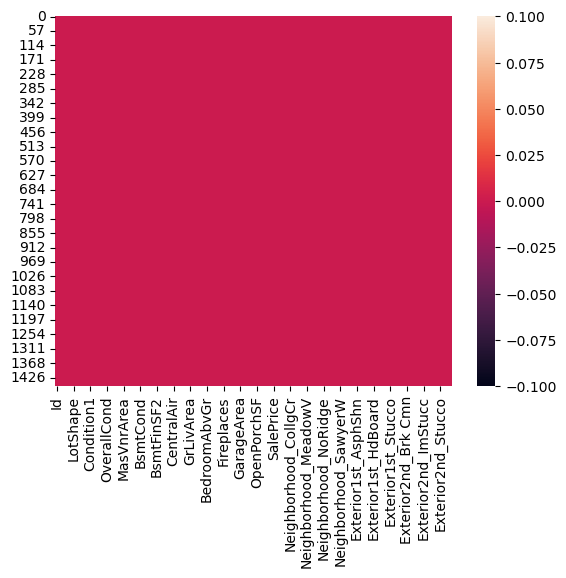

In [70]:
sns.heatmap(train_data.isna())

<b> 
This code generates two scatter plots to explore how certain features relate to "SalePrice in" "train_data". <br>
    The first plot examines how "OverallQual" (overall quality of materials and finishes) impacts the sale price, <br>
    while the second looks at the connection between "GrLivArea" (above-ground living area) and the sale price. <br>
    These visualizations help spot patterns or any unusual data points.
</b>

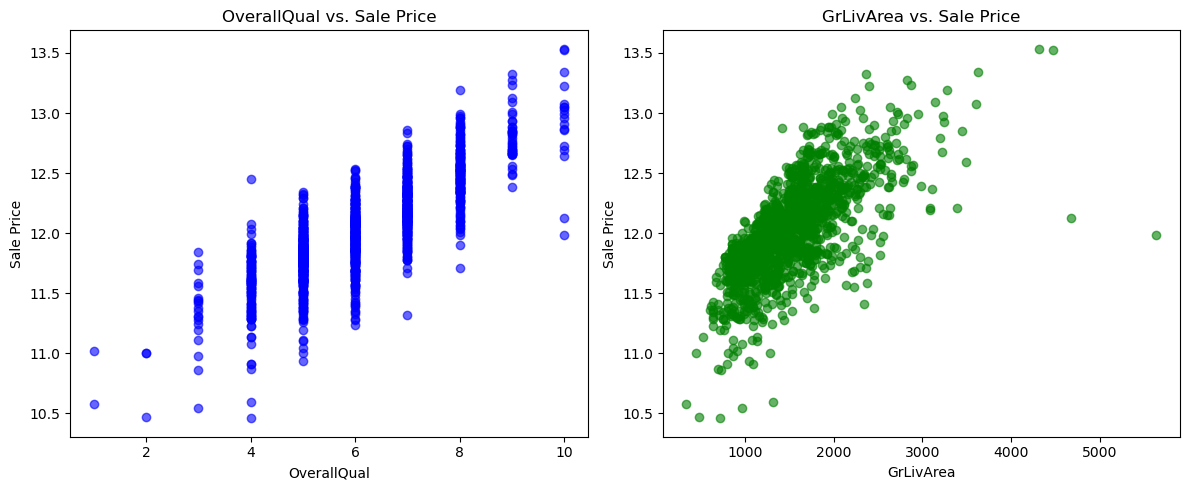

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot 1: OverallQual vs. SalePrice
plt.subplot(1, 2, 1)
plt.scatter(train_data.OverallQual, train_data.SalePrice, alpha=0.6, color='blue')
plt.xlabel('OverallQual')
plt.ylabel('Sale Price')
plt.title('OverallQual vs. Sale Price')

# Plot 2: GrLivArea vs. SalePrice
plt.subplot(1, 2, 2)
plt.scatter(train_data.GrLivArea, train_data.SalePrice, alpha=0.6, color='green')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('GrLivArea vs. Sale Price')

plt.tight_layout()
plt.show()

<b> 
This code creates new features by squaring and cubing certain columns (`OverallQual` and `GrLivArea`) in both the training and test datasets. By adding these new features, the dataset becomes more informative, helping the model better understand any non-linear patterns between these features and the sale price (`SalePrice`).
</b>

In [74]:

features = ['OverallQual', 'GrLivArea']
for feat in features:
   train_data[feat+'_p2'] = train_data[feat] **2
   train_data[feat+'_p3'] = train_data[feat] **3
    
for feat in features:
   test_data[feat+'_p2'] = test_data[feat] **2
   test_data[feat+'_p3'] = test_data[feat] **3


<b> This code filters out rows from "train_data" and "test_data" where the "GrLivArea" exceeds 3000, <br>
effectively removing potential outliers to focus on more representative data for model training and testing.

In [76]:
train_data = train_data.loc[~(train_data.GrLivArea > 3000)]
test_data = test_data.loc[~(test_data.GrLivArea > 3000)]

<b> This code applies one-hot encoding to both train_data and test_data and ensures that both datasets have the same columns.

</b>

In [78]:
train_data = pd.get_dummies(train_data)


test_data = pd.get_dummies(test_data)


test_data = test_data.reindex(columns=train_data.columns, fill_value=0)



In [79]:
test_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,OverallQual_p2,OverallQual_p3,GrLivArea_p2,GrLivArea_p3
0,1461,20,2,11622,1,3,3,0,4,1,...,0,0,0,1,0,0,25,125,802816,719323136
1,1462,20,3,14267,1,3,3,0,4,1,...,0,0,0,0,1,0,36,216,1766241,2347334289
2,1463,60,3,13830,1,3,3,0,4,1,...,0,0,0,1,0,0,25,125,2653641,4322781189
3,1464,60,3,9978,1,3,3,0,4,1,...,0,0,0,1,0,0,36,216,2572816,4126796864
4,1465,120,3,5005,1,3,1,0,4,1,...,0,0,0,0,0,0,64,512,1638400,2097152000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,0,4,1,...,0,0,0,0,0,0,16,64,1192464,1302170688
1455,2916,160,4,1894,1,3,3,0,4,1,...,0,0,0,0,0,0,16,64,1192464,1302170688
1456,2917,20,3,20000,1,3,3,0,4,1,...,0,0,0,1,0,0,25,125,1498176,1833767424
1457,2918,85,3,10441,1,3,3,0,4,1,...,0,0,0,0,0,1,25,125,940900,912673000


<b> 
This code prepares the training and test datasets for prediction by organizing the features and target variable, <br>
addressing any missing columns in the test data, and standardizing the input features so that both datasets are on the <br>
same scale for model training.
</b>
<b>  
Here I define train_x,train_y,and test_x. <br>
</b>

In [81]:
train_x = train_data.drop('SalePrice',axis =1)
train_x = train_x.drop('Id',axis=1)
train_y = pd.DataFrame(train_data.SalePrice)
index = train_x.columns
print(train_x)

from sklearn.preprocessing import StandardScaler#Normalize input data.
scaler = StandardScaler()
# train_x = scaler.fit(train_x).transform(train_x.astype(float))
#If you want to process test_x: use this code---test_x = scaler.fit(train_x).transform(test_x.astype(float))
train_x = pd.DataFrame(train_x, columns = index)
print(train_x)

print("** ** "*50)

# for test dataset

test_x = test_data.copy()
missing_cols = set(train_x.columns) - set(test_x.columns)
for col in missing_cols:
    test_x[col] = 0
    
test_x = test_x[train_x.columns]
test_x = scaler.fit(test_x).transform(test_x.astype(float))
test_x = pd.DataFrame(test_x, columns = index)

print(test_x)

      MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0             60         3     8450       1         3            3          0   
1             20         3     9600       1         3            3          0   
2             60         3    11250       1         3            3          0   
3             70         3     9550       1         3            3          0   
4             60         3    14260       1         3            3          0   
...          ...       ...      ...     ...       ...          ...        ...   
1455          60         3     7917       1         3            3          0   
1456          20         3    13175       1         3            3          0   
1457          70         3     9042       1         3            3          0   
1458          20         3     9717       1         3            3          0   
1459          20         3     9937       1         3            3          0   

      LotConfig  LandSlope 

In [82]:
test_x

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,OverallQual_p2,OverallQual_p3,GrLivArea_p2,GrLivArea_p3
0,-0.873517,-1.723356,0.391286,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-1.380632,...,-0.309712,-0.026261,-0.121183,1.358344,-0.391686,-0.174756,-0.775727,-0.755900,-1.032443,-0.822493
1,-0.873517,-0.104851,0.944712,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,-0.736191,2.553064,-0.174756,-0.161297,-0.251196,-0.403569,-0.438527
2,0.062406,-0.104851,0.853276,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,1.358344,-0.391686,-0.174756,-0.775727,-0.755900,0.175680,0.027382
3,0.062406,-0.104851,0.047304,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,1.358344,-0.391686,-0.174756,-0.161297,-0.251196,0.122922,-0.018840
4,1.466289,-0.104851,-0.993221,0.0,0.16742,-4.284096,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,-0.736191,-0.391686,-0.174756,1.402707,1.390479,-0.487017,-0.497532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2.402211,1.513653,-1.635363,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,-0.736191,-0.391686,-0.174756,-1.278443,-1.094218,-0.778101,-0.685029
1447,2.402211,1.513653,-1.644151,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,-0.736191,-0.391686,-0.174756,-1.278443,-1.094218,-0.778101,-0.685029
1448,-0.873517,-0.104851,2.144255,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,1.358344,-0.391686,-0.174756,-0.775727,-0.755900,-0.578548,-0.559651
1449,0.647357,-0.104851,0.144179,0.0,0.16742,0.253293,-0.037152,0.30228,-0.208589,-0.137120,...,-0.309712,-0.026261,-0.121183,-0.736191,-0.391686,5.722254,-0.775727,-0.755900,-0.942309,-0.776892


In [83]:
train_x

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,OverallQual_p2,OverallQual_p3,GrLivArea_p2,GrLivArea_p3
0,60,3,8450,1,3,3,0,4,1,2,...,0,0,0,1,0,0,49,343,2924100,5000211000
1,20,3,9600,1,3,3,0,2,1,1,...,0,0,0,0,0,0,36,216,1592644,2009916728
2,60,3,11250,1,3,3,0,4,1,2,...,0,0,0,1,0,0,49,343,3189796,5696975656
3,70,3,9550,1,3,3,0,4,1,2,...,0,0,0,0,0,1,49,343,2948089,5061868813
4,60,3,14260,1,3,3,0,2,1,2,...,0,0,0,1,0,0,64,512,4831204,10618986392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,1,2,...,0,0,0,1,0,0,36,216,2712609,4467667023
1456,20,3,13175,1,3,3,0,4,1,2,...,1,0,0,0,0,0,36,216,4297329,8908363017
1457,70,3,9042,1,3,3,0,4,1,2,...,0,0,0,0,0,0,49,343,5475600,12812904000
1458,20,3,9717,1,3,3,0,4,1,2,...,0,0,0,0,0,0,25,125,1162084,1252726552


<b> This code sets up a linear regression model using "LinearRegression" from the "sklearn.linear_model" module. The model variable stores the instance of the regression model, which can be trained on data to learn the linear relationship between input features and the target variable. Once trained, the model can be used to make predictions on new data.</b>

In [85]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

<b> 
    This line trains the linear regression model (model) using the training data.
</b>

In [87]:
model.fit(train_x,train_y)

LinearRegression()

<b>
Predict the train_x
</b>

In [89]:
prediction= model.predict(train_x)
prediction

array([[12.26323022],
       [12.26298655],
       [12.27525831],
       ...,
       [12.53991928],
       [11.83108637],
       [11.93597984]])

<b>
Calculating RMSE(Root Mean Squared Error) using metrics from sklearn 
</b>

In [91]:
from sklearn import metrics

predicted_prices = (prediction)
true_prices = (train_y)


score1 = metrics.mean_absolute_error(true_prices, predicted_prices)
score2 = metrics.mean_squared_error(true_prices, predicted_prices)
score3 = np.sqrt(metrics.mean_squared_error(true_prices, predicted_prices))


print("Mean Absolute Error:", score1)
print("Mean Squared Error:", score2)
print("Root Mean Squared Error:", score3)


Mean Absolute Error: 0.07725388520427488
Mean Squared Error: 0.01214330546929176
Root Mean Squared Error: 0.11019666723314167


<b>
Inversing the log tranformation using "exp"
</b>

In [93]:
from sklearn import metrics

predicted_prices = np.exp(prediction)
true_prices = np.exp(train_y)


score1 = metrics.mean_absolute_error(true_prices, predicted_prices)
score2 = metrics.mean_squared_error(true_prices, predicted_prices)
score3 = np.sqrt(metrics.mean_squared_error(true_prices, predicted_prices))


print("Mean Absolute Error:", score1)
print("Mean Squared Error:", score2)
print("Root Mean Squared Error:", score3)


Mean Absolute Error: 13072.139308671878
Mean Squared Error: 368296008.56430876
Root Mean Squared Error: 19191.039798935042


In [94]:
true_prices

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


<b>
    Prediction result of train_x
</b>

In [96]:
predictions = model.predict(train_x)


print(predictions)

[[12.26323022]
 [12.26298655]
 [12.27525831]
 ...
 [12.53991928]
 [11.83108637]
 [11.93597984]]


<b> 
    Prdeiction result of test_x
</b>

In [98]:
predictions = model.predict(test_x)


print(predictions)

[[11.5964844 ]
 [11.72685091]
 [11.810273  ]
 ...
 [11.63056545]
 [11.50720872]
 [11.79677849]]


<b>
    Inverse log transfrmation for predictions
</b>

In [100]:
predictions = np.expm1(predictions)
predictions

array([[108713.92878922],
       [123852.03182177],
       [134627.31049656],
       ...,
       [112482.9084461 ],
       [ 99428.95604482],
       [132822.769708  ]])

<b>
Save this predictions result as a csv file named "submission.csv"
</b>

In [102]:
predictions = predictions.flatten()  


results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})


results.to_csv('submission.csv', index=False)